In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib as mpl
from scipy import stats

In [2]:
data = Table.read('../gaiadr2/gaiadr2-good-plx-actions.fits')

/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


Number of stars : 710065


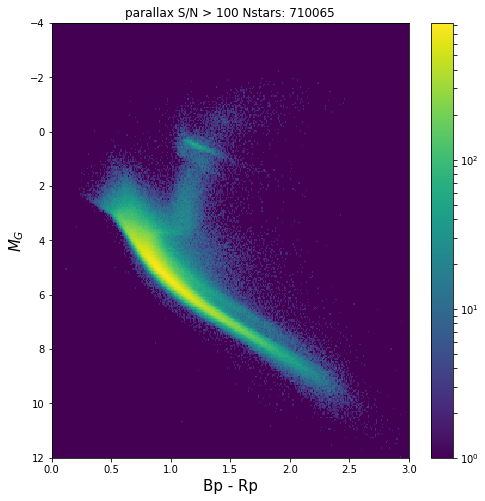

In [3]:
plt.figure(figsize =(8, 8))
hqt = ((2.5 / np.log(10) * data['phot_rp_mean_flux_error'] / data['phot_rp_mean_flux'] <= 0.05) &  
      (2.5 / np.log(10) * data['phot_bp_mean_flux_error'] / data['phot_bp_mean_flux'] <= 0.05) & 
      (2.5 / np.log(10) * data['phot_g_mean_flux_error'] / data['phot_g_mean_flux'] <= 0.05) & 
      (data['parallax']/data['parallax_error'] > 100))

datahq = data[hqt]
absmag = datahq['phot_g_mean_mag'] - 10. + 5.*np.log10(datahq['parallax'])
color = datahq['phot_bp_mean_mag'] - datahq['phot_rp_mean_mag']
nbins = 300
xbins = np.linspace(0, 3, nbins)
ybins = np.linspace(-4, 12, nbins)

H, xe, ye = np.histogram2d(color, absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('Bp - Rp', fontsize=15)
plt.ylabel('$M_G$', fontsize=15)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('parallax S/N > 100 Nstars: ' + str(np.sum(hqt)))
plt.savefig('StellarEvoModel_sn100.pdf', rasterized=True)
print('Number of stars :', np.sum(hqt))

In [4]:
import astropy.coordinates as coord
import astropy.units as u

In [5]:
c = coord.SkyCoord(data['ra']*u.deg, data['dec']*u.deg)
galac = c.transform_to(coord.Galactic)

/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


Number of stars : 3719150


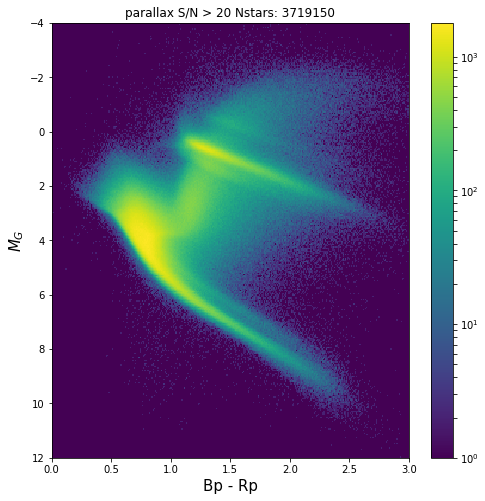

In [6]:
plt.figure(figsize =(8, 8))
hqt = ((2.5 / np.log(10) * data['phot_rp_mean_flux_error'] / data['phot_rp_mean_flux'] <= 0.05) &  
      (2.5 / np.log(10) * data['phot_bp_mean_flux_error'] / data['phot_bp_mean_flux'] <= 0.05) & 
      (2.5 / np.log(10) * data['phot_g_mean_flux_error'] / data['phot_g_mean_flux'] <= 0.05) & 
      (data['parallax']/data['parallax_error'] > 20) & 
      (1./data['parallax'] < 3.))
datahq = data[hqt]
absmag = datahq['phot_g_mean_mag'] - 10. + 5.*np.log10(datahq['parallax'])
color = datahq['phot_bp_mean_mag'] - datahq['phot_rp_mean_mag']
nbins = 300
xbins = np.linspace(0, 3, nbins)
ybins = np.linspace(-4, 12, nbins)

H, xe, ye = np.histogram2d(color, absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('Bp - Rp', fontsize=15)
plt.ylabel('$M_G$', fontsize=15)
plt.colorbar()
plt.title('parallax S/N > 20 Nstars: ' +  str(np.sum(hqt)))
plt.savefig('StellarEvoModel_sn20.pdf', rasterized=True)
print('Number of stars :', np.sum(hqt))

/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


Number of stars : 147458


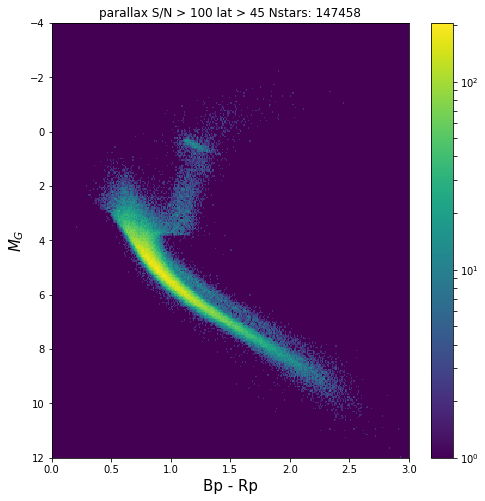

In [7]:
plt.figure(figsize =(8, 8))
hqt = ((2.5 / np.log(10) * data['phot_rp_mean_flux_error'] / data['phot_rp_mean_flux'] <= 0.05) &  
      (2.5 / np.log(10) * data['phot_bp_mean_flux_error'] / data['phot_bp_mean_flux'] <= 0.05) & 
      (2.5 / np.log(10) * data['phot_g_mean_flux_error'] / data['phot_g_mean_flux'] <= 0.05) & 
      (data['parallax']/data['parallax_error'] > 100) & 
      (np.abs(galac.b) > 45.*u.deg) & 
      (1./data['parallax'] < 3.))

datahq = data[hqt]
absmag = datahq['phot_g_mean_mag'] - 10. + 5.*np.log10(datahq['parallax'])
color = datahq['phot_bp_mean_mag'] - datahq['phot_rp_mean_mag']
nbins = 300
xbins = np.linspace(0, 3, nbins)
ybins = np.linspace(-4, 12, nbins)

H, xe, ye = np.histogram2d(color, absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('Bp - Rp', fontsize=15)
plt.ylabel('$M_G$', fontsize=15)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('parallax S/N > 100 lat > 45 Nstars: ' + str(np.sum(hqt)))
plt.savefig('StellarEvoModel_sn100_lat45.pdf', rasterized=True)
print('Number of stars :', np.sum(hqt))

Text(0.5,1,'distances')

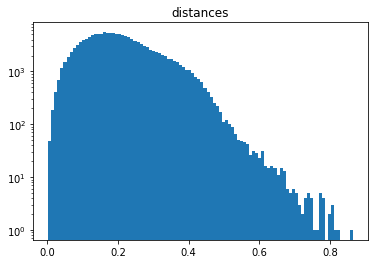

In [8]:
plt.hist(1./data[hqt]['parallax'], bins=100, log=True)
plt.title('distances')

/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


Number of stars : 563326


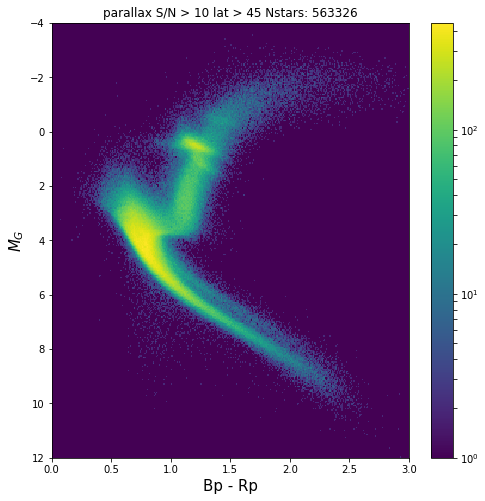

In [9]:
plt.figure(figsize =(8, 8))
hqt = ((2.5 / np.log(10) * data['phot_rp_mean_flux_error'] / data['phot_rp_mean_flux'] <= 0.1) &  
      (2.5 / np.log(10) * data['phot_bp_mean_flux_error'] / data['phot_bp_mean_flux'] <= 0.1) & 
      (2.5 / np.log(10) * data['phot_g_mean_flux_error'] / data['phot_g_mean_flux'] <= 0.1) & 
      (data['parallax']/data['parallax_error'] > 10) & 
      (np.abs(galac.b) > 45.*u.deg) & 
      (1./data['parallax'] < 3.))

datahq = data[hqt]
absmag = datahq['phot_g_mean_mag'] - 10. + 5.*np.log10(datahq['parallax'])
color = datahq['phot_bp_mean_mag'] - datahq['phot_rp_mean_mag']
nbins = 300
xbins = np.linspace(0, 3, nbins)
ybins = np.linspace(-4, 12, nbins)

H, xe, ye = np.histogram2d(color, absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('Bp - Rp', fontsize=15)
plt.ylabel('$M_G$', fontsize=15)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('parallax S/N > 10 lat > 45 Nstars: ' +  str(np.sum(hqt)))
plt.savefig('StellarEvoModel_sn10_lat45.pdf', rasterized=True)
print('Number of stars :', np.sum(hqt))


/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


Number of stars : 578789


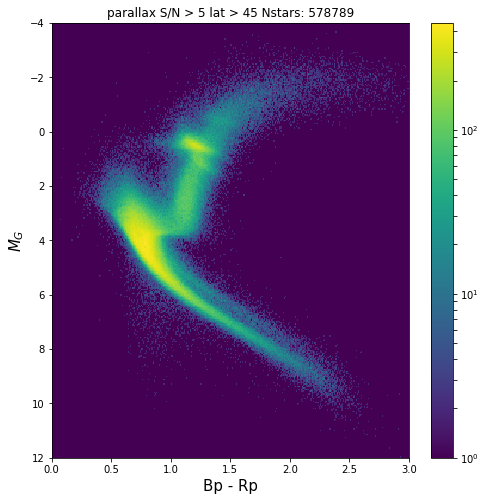

In [10]:
plt.figure(figsize =(8, 8))
hqt = ((2.5 / np.log(10) * data['phot_rp_mean_flux_error'] / data['phot_rp_mean_flux'] <= 0.1) &  
      (2.5 / np.log(10) * data['phot_bp_mean_flux_error'] / data['phot_bp_mean_flux'] <= 0.1) & 
      (2.5 / np.log(10) * data['phot_g_mean_flux_error'] / data['phot_g_mean_flux'] <= 0.1) & 
      (data['parallax']/data['parallax_error'] > 5) & 
      (np.abs(galac.b) > 45.*u.deg) & 
      (1./data['parallax'] < 3.))

datahq = data[hqt]
absmag = datahq['phot_g_mean_mag'] - 10. + 5.*np.log10(datahq['parallax'])
color = datahq['phot_bp_mean_mag'] - datahq['phot_rp_mean_mag']
nbins = 300
xbins = np.linspace(0, 3, nbins)
ybins = np.linspace(-4, 12, nbins)

H, xe, ye = np.histogram2d(color, absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('Bp - Rp', fontsize=15)
plt.ylabel('$M_G$', fontsize=15)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('parallax S/N > 5 lat > 45 Nstars: ' +  str(np.sum(hqt)))
plt.savefig('StellarEvoModel_sn5_lat45.pdf', rasterized=True)
print('Number of stars :', np.sum(hqt))


Text(0.5,1,'fluxerr')

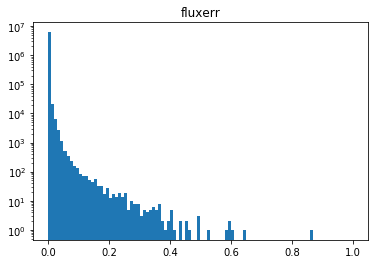

In [11]:
fluxerr = 2.5 / np.log(10) * data['phot_rp_mean_flux_error'] / data['phot_rp_mean_flux']
plt.hist(fluxerr[~np.isnan(fluxerr)], bins=100, log=True, range=(0, 1))
plt.title('fluxerr')

The parallax and magnitude estimates can be noisy, we just need there to be no dust 

In [12]:
data = Table.read('dust-result.fits.gz')

In [13]:
np.max(1./data['parallax'])

0.9674273628422747

In [82]:
absmag = data['h_m'] - 5.*np.log10(1./(data['parallax']/1e2))
works = absmag < 3

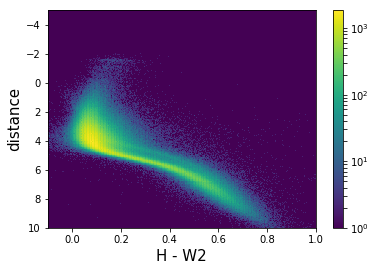

In [83]:
absmag = data['h_m'] - 5.*np.log10(1./(data['parallax']/1e2))
nbins = 300
ybins = np.linspace(-5, 10, nbins)
xbins = np.linspace(-.1, 1, nbins)

H, xe, ye = np.histogram2d(data['h_m'] - data['w2mpro'], absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('distance', fontsize=15)
plt.colorbar()


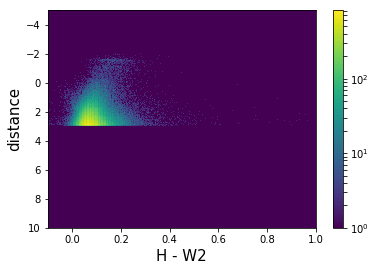

In [84]:
nbins = 300
ybins = np.linspace(-5, 10, nbins)
xbins = np.linspace(-.1, 1, nbins)

H, xe, ye = np.histogram2d(data['h_m'][works] - data['w2mpro'][works], absmag[works], bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('distance', fontsize=15)
plt.colorbar()


In [27]:
A_k = 0.918*(data['h_m'] - data['w2mpro']- 0.08)
varA_k = 0.918**2.*(data['h_msigcom']**2 + data['w2mpro_error']**2)
Q_K  = 0.302

EBV = A_k/Q_K
varEBV = varA_k/Q_K

In [18]:
from dustmaps.sfd import SFDQuery
from dustmaps.bayestar import BayestarQuery
import astropy.coordinates as coord
import astropy.units as u
import scipy.stats
from astropy.table import Table, unique, Column, hstack, vstack

In [87]:
def dust(ra, dec, distance, max_samples=10, mode='median'):
    c = coord.SkyCoord(ra, dec, distance=distance)
    sfd = SFDQuery()
    bayes = BayestarQuery(max_samples=max_samples)

    return sfd(c), bayes(c, mode=mode, return_flags=False) #, iphas(c, mode=mode), marshall(c), chen(c)
def getDust(G, bp, rp, ebv, maxnit=100):
    """ Compute the Gaia extinctions assuming relations from Babusieux
    Arguments: G, bp, rp, E(B-V)
    maxnit -- number of iterations
    Returns extinction in G,bp, rp
    Author: Sergey Koposov skoposov@cmu.edu
    """
    c1, c2, c3, c4, c5, c6, c7 = [0.9761, -0.1704,
                                  0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    d1, d2, d3, d4, d5, d6, d7 = [
        1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    e1, e2, e3, e4, e5, e6, e7 = [
        0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    A0 = 3.1*ebv
    P1 = np.poly1d([c1, c2, c3, c4][::-1])

    def F1(bprp): return np.poly1d(
        [c1, c2, c3, c4][::-1])(bprp)+c5*A0+c6*A0**2+c7*bprp*A0

    def F2(bprp): return np.poly1d(
        [d1, d2, d3, d4][::-1])(bprp)+d5*A0+d6*A0**2+d7*bprp*A0

    def F3(bprp): return np.poly1d(
        [e1, e2, e3, e4][::-1])(bprp)+e5*A0+e6*A0**2+e7*bprp*A0
    xind = np.isfinite(bp+rp+G)
    curbp = bp-rp
    for i in range(maxnit):
        AG = F1(curbp)*A0
        Abp = F2(curbp)*A0
        Arp = F3(curbp)*A0
        curbp1 = bp-rp-Abp+Arp

        delta = np.abs(curbp1-curbp)[xind]
        curbp = curbp1
    print(scipy.stats.scoreatpercentile(delta[np.isfinite(delta)], 99))
    AG = F1(curbp)*A0
    Abp = F2(curbp)*A0
    Arp = F3(curbp)*A0
    return AG, Abp, Arp

In [131]:
sfddust, bayesdust = dust(data['ra'], data['dec'], 1./data['parallax']/u.mas*u.kpc, max_samples=10, 
                          mode='median')

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 658391 results
  r = func(a, **kwargs)


In [130]:
1./data['parallax']*u.kpc/u.mas

<Quantity [0.50149595, 0.40965162, 0.24060481, ..., 0.31559877, 0.21571103,
           0.12422406] kpc>

In [133]:
bayesdust.shape

(2005296,)

I'm fucking something up, why is this shape not # stars, #samples # distance bins?

In [134]:
AGbayes, Abpbayes, Arpbayes = getDust(data['phot_g_mean_mag'], 
                       data['phot_bp_mean_mag'], 
                       data['phot_rp_mean_mag'], bayesdust)

/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


0.0


In [72]:
AG, Abp, Arp = getDust(data['phot_g_mean_mag'], 
                       data['phot_bp_mean_mag'], 
                       data['phot_rp_mean_mag'], EBV)

/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in multiply


8.881784197001252e-16


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


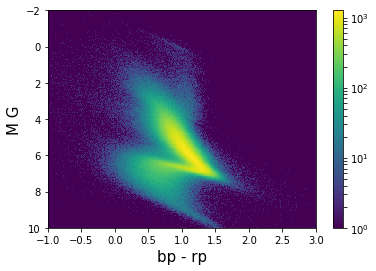

In [76]:
absmag = data['phot_g_mean_mag'] - 5.*np.log10(1./(data['parallax']/1e2))
nbins = 300
ybins = np.linspace(-2, 10, nbins)
xbins = np.linspace(-1, 3, nbins)

H, xe, ye = np.histogram2d(data['phot_bp_mean_mag'] - data['phot_rp_mean_mag'] - (Abp - Arp), absmag - AG, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('bp - rp', fontsize=15)
plt.ylabel('M G', fontsize=15)
plt.colorbar()


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


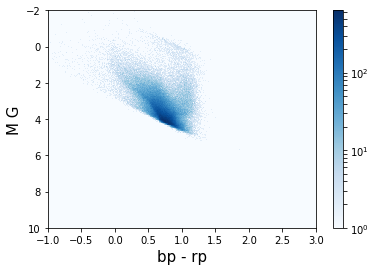

In [150]:
absmag = data['phot_g_mean_mag'] - 5.*np.log10(1./(data['parallax']/1e2))
nbins = 300
ybins = np.linspace(-2, 10, nbins)
xbins = np.linspace(-1, 3, nbins)

H, xe, ye = np.histogram2d(data['phot_bp_mean_mag'][works] - 
                           data['phot_rp_mean_mag'][works] - 
                           (np.clip(Abp, 0.0, None) - np.clip(Arp, 0.0, None))[works], 
                           absmag[works] - np.clip(AG[works], 0.0, None), bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('bp - rp', fontsize=15)
plt.ylabel('M G', fontsize=15)
plt.colorbar()
plt.savefig('cmd_rjceCorrected.pdf')

In [ ]:
absmag = data['phot_g_mean_mag'] - 5.*np.log10(1./(data['parallax']/1e2))
nbins = 300
ybins = np.linspace(-2, 10, nbins)
xbins = np.linspace(-1, 3, nbins)

H, xe, ye = np.histogram2d(data['phot_bp_mean_mag'][works] - 
                           data['phot_rp_mean_mag'][works] - 
                           (np.clip(Abp, 0.0, None) - np.clip(Arp, 0.0, None))[works], 
                           absmag[works] - np.clip(AG[works], 0.0, None), bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('bp - rp', fontsize=15)
plt.ylabel('M G', fontsize=15)
plt.colorbar()


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


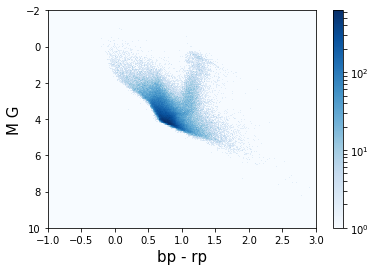

In [151]:
absmag = data['phot_g_mean_mag'] - 5.*np.log10(1./(data['parallax']/1e2))
nbins = 300
ybins = np.linspace(-2, 10, nbins)
xbins = np.linspace(-1, 3, nbins)

H, xe, ye = np.histogram2d(data['phot_bp_mean_mag'][works] - data['phot_rp_mean_mag'][works] , absmag[works], bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('bp - rp', fontsize=15)
plt.ylabel('M G', fontsize=15)
plt.colorbar()
plt.savefig('cmd.pdf')

In [86]:
bayesdust[0][-1]

array([0.011015, 0.01221 , 0.01884 , 0.024025, 0.0268  , 0.036015,
       0.037485, 0.037965, 0.044115, 0.045795, 0.049705, 0.05009 ,
       0.050345, 0.05175 , 0.051965, 0.051985, 0.051995, 0.051995,
       0.051995, 0.051995, 0.051995, 0.051995, 0.051995, 0.051995,
       0.051995, 0.051995, 0.051995, 0.051995, 0.051995, 0.051995,
       0.051995], dtype=float32)

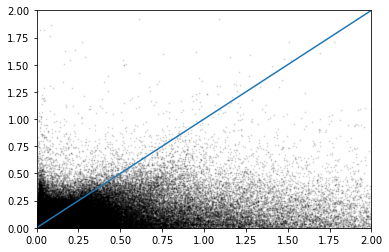

In [95]:
plt.plot(sfddust[works], EBV[works], 'ko', alpha=0.1, markersize=1)
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.plot([0, 2], [0,2])

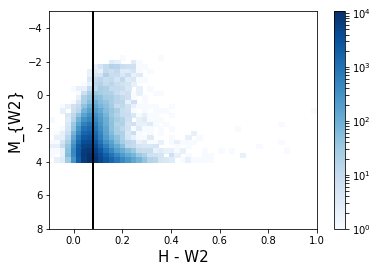

In [218]:
nbins = 50
ybins = np.linspace(-5, 8, nbins)
xbins = np.linspace(-.1, 1.0, nbins)
absmag = data['w2mpro'] - 5.*np.log10(1./(data['parallax']/1e2))
works = absmag < 4
H, xe, ye = np.histogram2d(data['h_m'][works & highlat] - data['w2mpro'][works& highlat], 
                           absmag[works & highlat], 
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('M_{W2}', fontsize=15)
plt.colorbar()
plt.axvline(0.08, c='black', linewidth=2)
plt.savefig('cmd_rjce.pdf')
plt.savefig('cmd_rjce.png')

In [155]:
c = coord.SkyCoord(data['ra'], data['dec'], distance=1./data['parallax']/u.mas*u.kpc)

In [156]:
galc = c.transform_to(coord.Galactic)

In [157]:
galacitc = c.transform_to(coord.Galactocentric)

In [160]:
highlat = np.abs(galc.b) > 45*u.deg

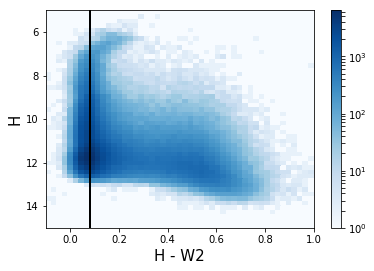

In [205]:
nbins = 50
ybins = np.linspace(5, 15, nbins)
xbins = np.linspace(-.1, 1.0, nbins)

H, xe, ye = np.histogram2d(data['h_m'][highlat] - data['w2mpro'][highlat], 
                           data['h_m'][highlat], 
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('H', fontsize=15)
plt.colorbar()
plt.axvline(0.08, c='black', linewidth=2)
plt.savefig('cmd_rjce.pdf')
plt.savefig('cmd_rjce.png')

In [247]:
bayesdust.shape

(2005296,)

-3.0 -2.0
-2.0 -1.0
-1.0 0.0
0.0 1.0
1.0 2.0
2.0 3.0
3.0 4.0
4.0 5.0


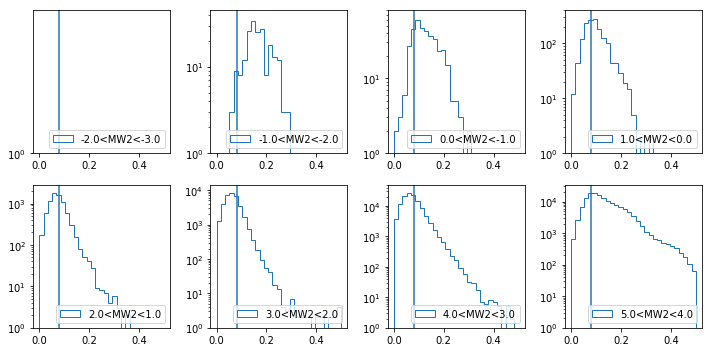

In [318]:
Q_H = 0.449
dustvalues = bayesdust*Q_H
dustvalues[np.isnan(dustvalues)] = 0.0
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
ax = ax.flatten()
absmag = data['w2mpro'] - 5.*np.log10(1./(data['parallax']/1e2))
nw2bins = 9
ncolorbins = 30
absw2bins = np.linspace(-3, 5, nw2bins)
color=iter(plt.cm.Blues(np.linspace(0,1, nw2bins)))
hw2bins = np.linspace(0, 0.5, ncolorbins)
for i in range(len(absw2bins)-1):
    ibin = (absmag > absw2bins[i]) & (absmag <= absw2bins[i+1])
    print(absw2bins[i], absw2bins[i+1])
    ax[i].hist((data['h_m'] - data['w2mpro'] - dustvalues)[highlat & ibin], 
               bins=hw2bins, histtype='step', log=True, 
               label='{0:.1f}<MW2<{1:.1f}'.format(absw2bins[i+1], absw2bins[i]))
    ax[i].legend(loc='lower right')
    ax[i].set_ylim(1,)
    ax[i].axvline(0.08)
plt.tight_layout()

Text(0.5,1,'dust values at high lat')

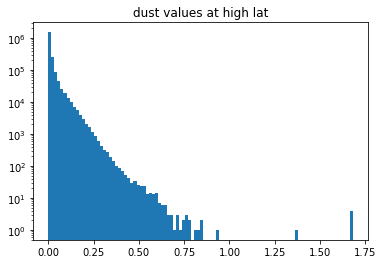

In [252]:
plt.hist(dustvalues, bins=100, log=True)
plt.title('dust values at high lat')

-2.0 -1.72


/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


-1.72 -1.44
-1.44 -1.16
-1.16 -0.8799999999999999
-0.8799999999999999 -0.5999999999999999
-0.5999999999999999 -0.31999999999999984
-0.31999999999999984 -0.039999999999999813
-0.039999999999999813 0.2400000000000002
0.2400000000000002 0.5200000000000005
0.5200000000000005 0.8000000000000003
0.8000000000000003 1.08
1.08 1.3600000000000003
1.3600000000000003 1.6400000000000006
1.6400000000000006 1.9200000000000004
1.9200000000000004 2.2
2.2 2.4800000000000004
2.4800000000000004 2.7600000000000007
2.7600000000000007 3.040000000000001
3.040000000000001 3.3200000000000003
3.3200000000000003 3.6000000000000005
3.6000000000000005 3.880000000000001
3.880000000000001 4.16
4.16 4.44
4.44 4.720000000000001
4.720000000000001 5.0


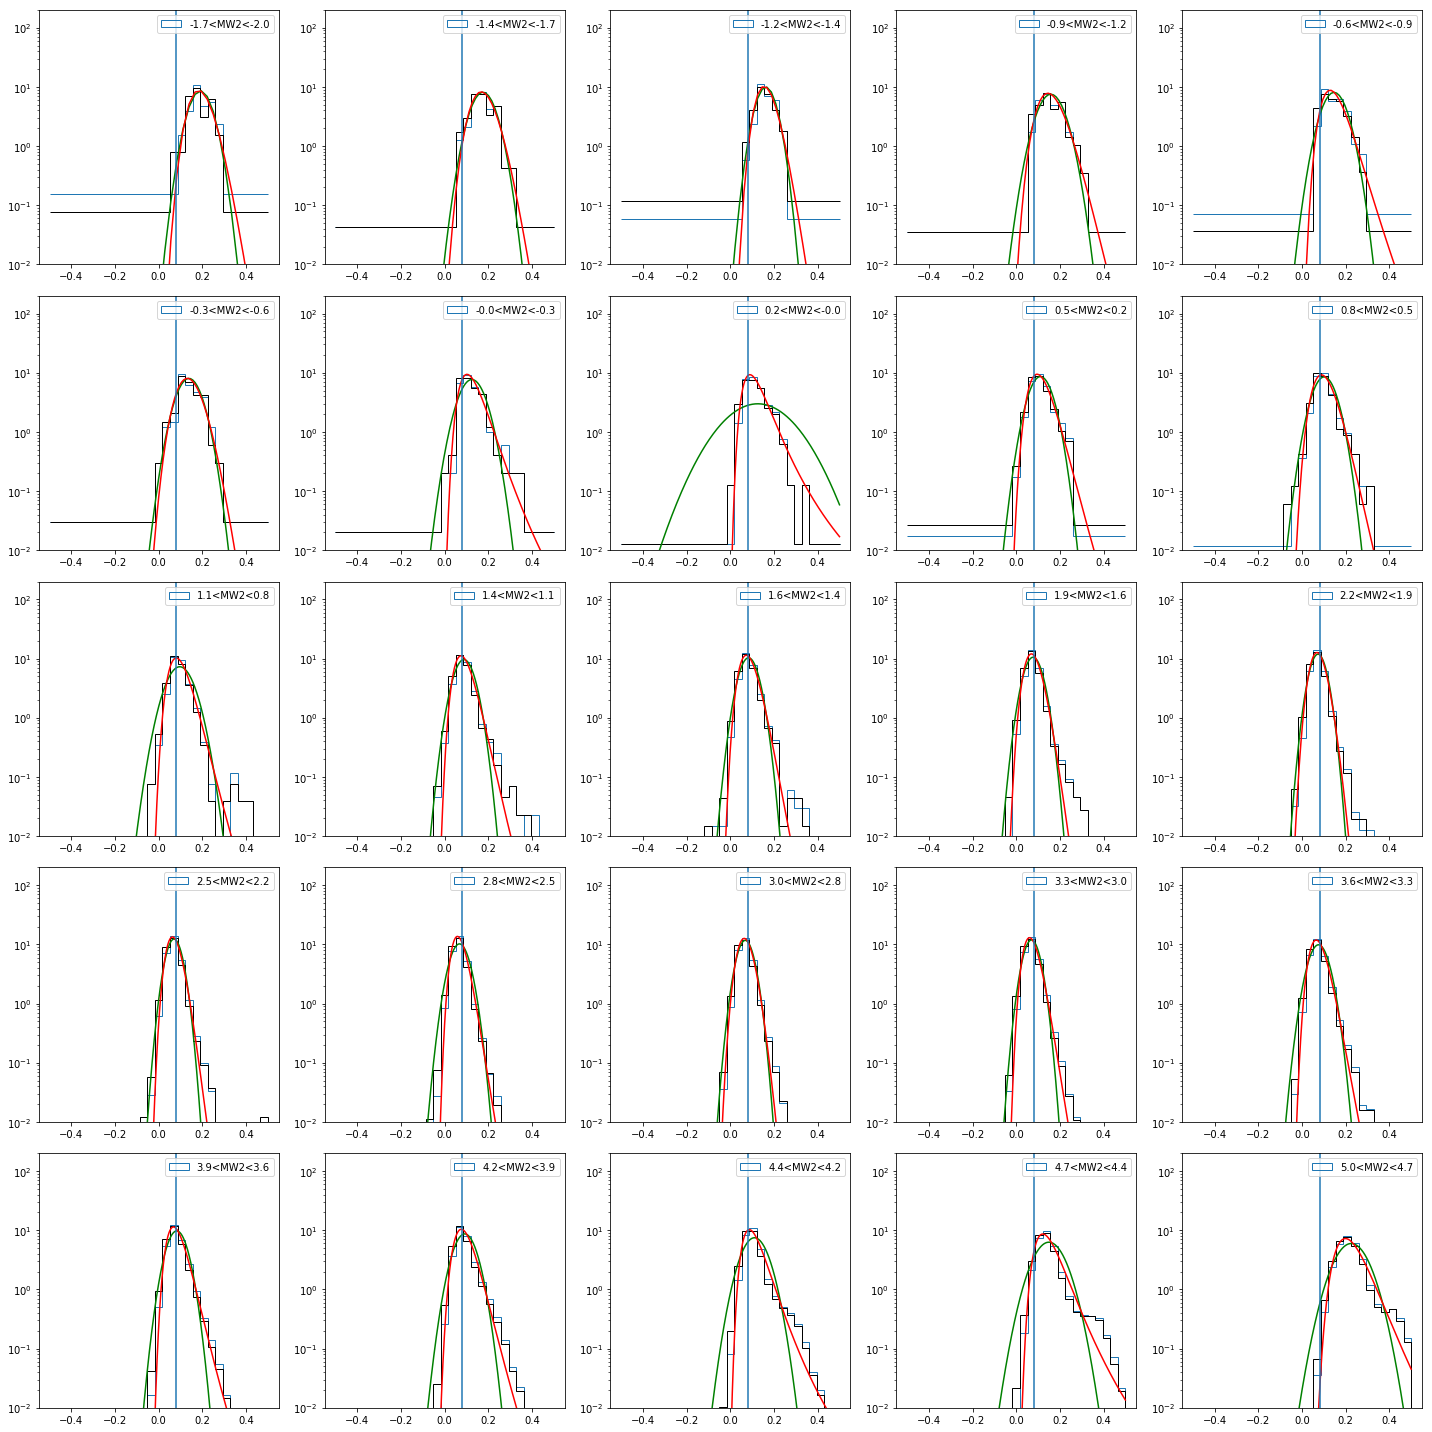

In [321]:
xmin = -0.5
xmax = 0.5
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
ax = ax.flatten()
absmag = data['w2mpro'] - 5.*np.log10(1./(data['parallax']/1e2))
nw2bins = 26
ncolorbins = 30
absw2bins = np.linspace(-2, 5, nw2bins)
color=iter(plt.cm.Blues(np.linspace(0, 1, nw2bins)))
hw2bins = np.linspace(xmin, xmax, ncolorbins)

mean = np.zeros(len(absw2bins) - 1)
std  = np.zeros(len(absw2bins) - 1)
for i in range(len(absw2bins)-1):
    ibin = (absmag > absw2bins[i]) & (absmag <= absw2bins[i+1])
    print(absw2bins[i], absw2bins[i+1])
    ax[i].hist((data['h_m'] - data['w2mpro'])[highlat & ibin], 
               bins=hw2bins, histtype='step', log=True, 
               label='{0:.1f}<MW2<{1:.1f}'.format(absw2bins[i+1], absw2bins[i]), normed=True)
    ax[i].hist((data['h_m'] - data['w2mpro'] - dustvalues)[highlat & ibin], 
               bins=hw2bins, histtype='step', log=True, color='black', normed=True, label=None)
    ser = (data['h_m'] - data['w2mpro'])[highlat & ibin]
    lnspc = np.linspace(xmin, xmax, len(ser))
    # lets try the normal distribution first
    m, s = stats.norm.fit(ser) # get mean and standard deviation  
    pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
    ax[i].plot(lnspc, pdf_g, color='green') # plot it
    mean[i] = m
    std[i] = s
    
    # exactly same as above
    ag,bg,cg = stats.alpha.fit(ser)  
    pdf_alpha = stats.alpha.pdf(lnspc, ag, bg,cg)  
    ax[i].plot(lnspc, pdf_alpha, color='red')

    # guess what :) 
    #ab,bb,cb,db = stats.beta.fit(ser)  
    #pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
    #ax[i].plot(lnspc, pdf_beta, label="Beta", color='purple')


    ax[i].set_ylim(0.01,200)
    ax[i].axvline(0.08)
    ax[i].legend(loc='upper right')
plt.tight_layout()

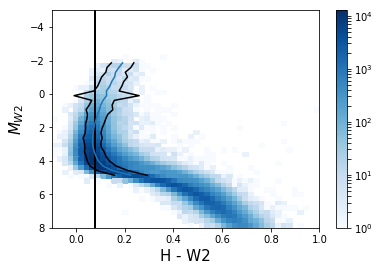

In [337]:
nbins = 50
ybins = np.linspace(-5, 8, nbins)
xbins = np.linspace(-.1, 1.0, nbins)
absmag = data['w2mpro'] - 5.*np.log10(1./(data['parallax']/1e2))
works = absmag < 4
H, xe, ye = np.histogram2d(data['h_m'][highlat] - data['w2mpro'][highlat], 
                           absmag[highlat], 
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('$M_{W2}$', fontsize=15)
plt.colorbar()
plt.axvline(0.08, c='black', linewidth=2)
plt.savefig('cmd_rjce.pdf')
plt.savefig('cmd_rjce.png')
plt.plot(mean, 0.5*(absw2bins[1:] + absw2bins[:-1]))
plt.plot(mean-std, 0.5*(absw2bins[1:] + absw2bins[:-1]), c='black')
plt.plot(mean+std, 0.5*(absw2bins[1:] + absw2bins[:-1]), c='black')


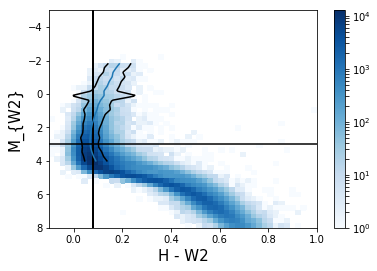

In [345]:
fmean = scipy.interpolate.interp1d(0.5*(absw2bins[1:] + absw2bins[:-1]), mean)
fstd = scipy.interpolate.interp1d(0.5*(absw2bins[1:] + absw2bins[:-1]), std)
nbins = 50
ybins = np.linspace(-5, 8, nbins)
xbins = np.linspace(-.1, 1.0, nbins)
absmag = data['w2mpro'] - 5.*np.log10(1./(data['parallax']/1e2))
works = absmag < 4
H, xe, ye = np.histogram2d(data['h_m'][highlat] - data['w2mpro'][highlat], 
                           absmag[highlat], 
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.gca().invert_yaxis()
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('M_{W2}', fontsize=15)
plt.colorbar()
plt.axvline(0.08, c='black', linewidth=2)
plt.savefig('cmd_rjce.pdf')
plt.savefig('cmd_rjce.png')
absmagx = np.linspace(-1.8, 4, 100)
plt.plot(fmean(absmagx), absmagx)
plt.plot(fmean(absmagx) - fstd(absmagx), absmagx, c='black')
plt.plot(fmean(absmagx) + fstd(absmagx), absmagx, c='black')
plt.axhline(3, color = 'black')

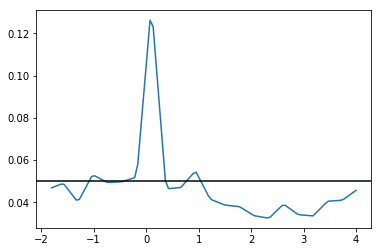

In [341]:
plt.plot(absmagx, fstd(absmagx))
plt.axhline(0.05, color='black')

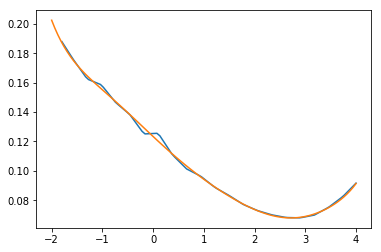

In [330]:
absmagx = np.linspace(-1.8, 4, 100)
plt.plot(absmagx, fmean(absmagx))
cubmean = np.polyfit(0.5*(absw2bins[1:] + absw2bins[:-1]), mean, 9)
fcubmean = np.poly1d(cubmean)
absmagxnew = np.linspace(-2., 4, 100)
plt.plot(absmagxnew, fcubmean(absmagxnew))

In [342]:
absmag = data['w2mpro'] - 5.*np.log10(1./(data['parallax']/1e2))
works = (absmag > -2) & (absmag < 3)
print(np.sum(works))
Ak = 0.918*(data['h_m'] - data['w2mpro'] - fcubmean(absmag))
varAk = 0.918**2.*(data['h_msigcom']**2 + data['w2mpro_error']**2 + 0.05**2)

282947


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


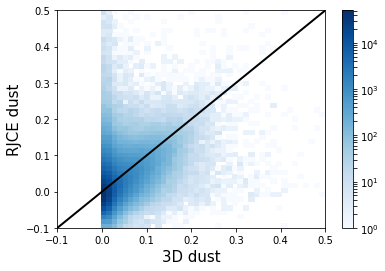

In [352]:
nbins = 50
ybins = np.linspace(-0.1, 0.5, nbins)
xbins = np.linspace(-0.1, 0.5, nbins)

H, xe, ye = np.histogram2d(bayesdust[works]*Q_K, 
                           Ak[works], 
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('3D dust', fontsize=15)
plt.ylabel('RJCE dust', fontsize=15)
plt.colorbar()
plt.plot([-0.1, 0.5],[-0.1, 0.5], c='black', linewidth=2)
plt.savefig('rjce_3ddust.pdf')
plt.savefig('rjce_3ddust.png')

In [359]:
np.min(varAk)

0.002486035796742882

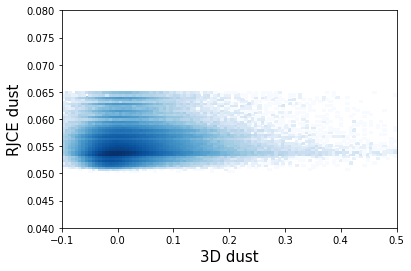

In [362]:
nbins = 100
ybins = np.linspace(0.04, 0.08, nbins)
xbins = np.linspace(-0.1, 0.5, nbins)

H, xe, ye = np.histogram2d(Ak[works],
                           np.sqrt(varAk[works]),
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('3D dust', fontsize=15)
plt.ylabel('RJCE dust', fontsize=15)
#plt.colorbar()
plt.savefig('rjce_3ddust.pdf')
plt.savefig('rjce_3ddust.png')

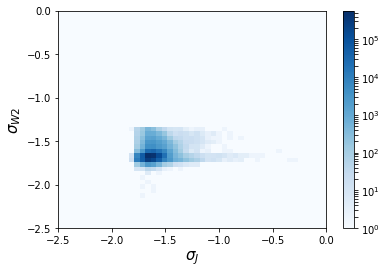

In [185]:
nbins = 50
ybins = np.linspace(-2.5, 0, nbins)
xbins = np.linspace(-2.5, 0, nbins)

H, xe, ye = np.histogram2d(np.log10(data['j_msigcom'][~np.isnan(data['j_msigcom']) & ~np.isnan(data['w2mpro_error'])]), 
                           np.log10(data['w2mpro_error'][~np.isnan(data['j_msigcom']) & ~np.isnan(data['w2mpro_error'])]), 
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('$\sigma_J$', fontsize=15)
plt.ylabel('$\sigma_{W2}$', fontsize=15)
plt.colorbar()


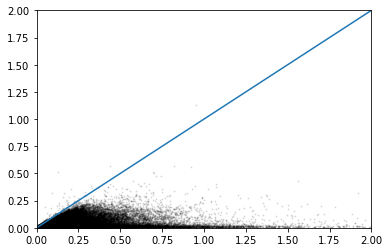

In [135]:
plt.plot(sfddust[works]*Q_K, bayesdust[works]*Q_K, 'ko', alpha=0.1, markersize=1)
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.plot([0, 2], [0,2])

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


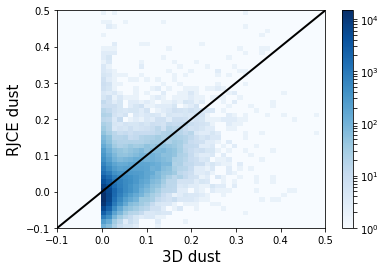

In [154]:
nbins = 50
ybins = np.linspace(-0.1, 0.5, nbins)
xbins = np.linspace(-0.1, 0.5, nbins)

H, xe, ye = np.histogram2d(bayesdust[works]*Q_K, 
                           A_k[works], 
                           bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('3D dust', fontsize=15)
plt.ylabel('RJCE dust', fontsize=15)
plt.colorbar()
plt.plot([-0.1, 0.5],[-0.1, 0.5], c='black', linewidth=2)
plt.savefig('rjce_3ddust.pdf')
plt.savefig('rjce_3ddust.png')

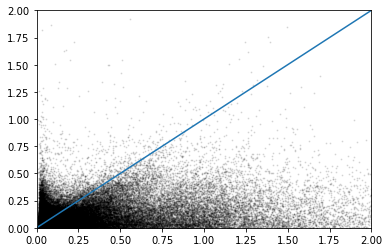

In [85]:
plt.plot(bayesdust[0][:,30][works], EBV[works], 'ko', alpha=0.1, markersize=1)
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.plot([0, 2], [0,2])

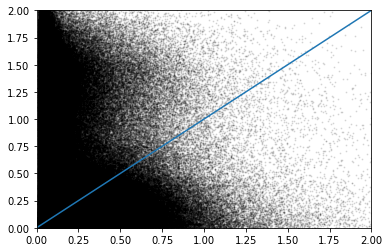

In [58]:
plt.plot(np.mean(bayesdust[0], axis=1), EBV, 'ko', alpha=0.1, markersize=1)
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.plot([0, 2], [0,2])

In [22]:
varA_k

0.0008637921372802745
0.0008174422898922228
0.0007087308687865086
0.0009345809532802747
0.0009067710451720565
0.0007087308687865086
0.0007795196847865085
0.0008983438212802746
0.0008570503251693324
0.0007795196909224494
0.000985987097897671


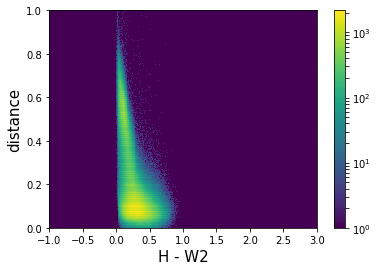

In [23]:
nbins = 300
xbins = np.linspace(-1, 3, nbins)
ybins = np.linspace(0, 1, nbins)

H, xe, ye = np.histogram2d(1./data['parallax'], data['h_m'] - data['w2mpro'], bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('distance', fontsize=15)
plt.colorbar()


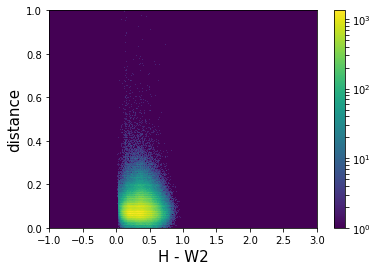

In [24]:
nbins = 300
xbins = np.linspace(-1, 3, nbins)
ybins = np.linspace(0, 1, nbins)

H, xe, ye = np.histogram2d(1./data['parallax'][absmag < 4], data['h_m'][absmag < 4] - data['w2mpro'][absmag<4], bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('distance', fontsize=15)
plt.colorbar()


In [25]:
import xdgmm

In [26]:
X = pd.DataFrame(data={'bprp':color, 
                       'G':absmag})
Xerr = pd.DataFrame(data={'brpr_err': ,
                          'b_err':np.zeros(len(cGal)),
                          'vl_err':v_err, 
                          'vb_err':v_err,
                          'd_err':d_err})

SyntaxError: invalid syntax (<ipython-input-26-e38819b7c728>, line 3)

In [ ]:
n_components = 32
try: 
    xdgmm = XDGMM(filename = 'xdgmm_n{0}.fit'.format(n_components))
except FileNotFoundError:
    xdgmm = XDGMM(n_components=n_components, method='Bovy', n_iter=int(1e9), w=0.00001)
    xdgmm.fit(np.array(X[['l', 'b', 'vl', 'vb', 'distance']]), np.array(Xerr[['l_err', 'b_err', 'vl_err', 'vb_err', 'd_err']]))
    xdgmm.save_model(filename='xdgmm_n{0}.fit'.format(xdgmm.n_components))

In [ ]:
coord = coord.SkyCoord(data['ra']*u.deg, data['dec']*u.deg)
galac = coord.transform_to

In [ ]:
import numpy as np

In [ ]:
np.min(data['parallax']/data['parallax_error'])

In [ ]:
flux_error = 

In [ ]:
np.min(flux_error)

In [ ]:
np.max(flux_error[~np.isnan(flux_error)])

In [ ]:
data.columns.keys()

In [ ]:
data = Table.read('1543351631')